In [9]:
using Statistics
using DelimitedFiles
using Plots
using LaTeXStrings
using LinearAlgebra
using LsqFit
using Test

In [10]:
pyplot()

Plots.PyPlotBackend()

In [11]:
using StatsBase

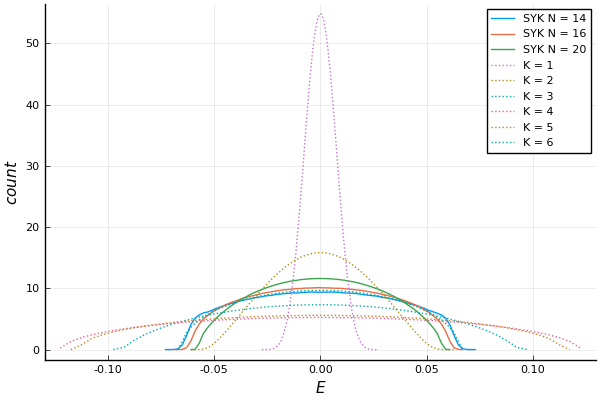

In [16]:
N = [14, 16, 20]
matrix_size = Int.(2 .^ (N ./2))
it_num = [78125, 39063, 9766]
plot()
for i in 1:3
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd1 = reshape(fd1, matrix_size[i]*it_num[i]) ./ N[i];
    h = fit(Histogram, fd1, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "SYK N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")

K = [1, 2, 3, 4, 5, 6]
N = 6
L = 12
matrix_size = binomial(12, 6)
it_num = 11_000
for i in 1:6
    file_fd = string("eig_saves/All_Meml", L, "_", N, "_", K[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape(fd1, matrix_size*it_num) ./ matrix_size;
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = K[i]
    plot!(x, h.weights, label = "K = $N_i", ls = :dot)
end
ylabel!(L"count")
xlabel!(L"E")

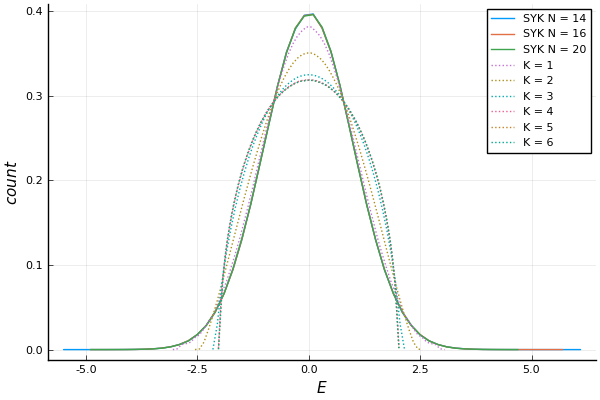

In [22]:
N = [14, 16, 20]
matrix_size = Int.(2 .^ (N ./2))
it_num = [78125, 39063, 9766]
plot()
for i in 1:3
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size[i]*it_num[i]);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "SYK N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")

K = [1, 2, 3, 4, 5, 6]
N = 6
L = 12
matrix_size = binomial(12, 6)
it_num = 11_000
for i in 1:6
    file_fd = string("eig_saves/All_Meml", L, "_", N, "_", K[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size*it_num);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = K[i]
    plot!(x, h.weights, label = "K = $N_i", ls = :dot)
end
ylabel!(L"count")
xlabel!(L"E")

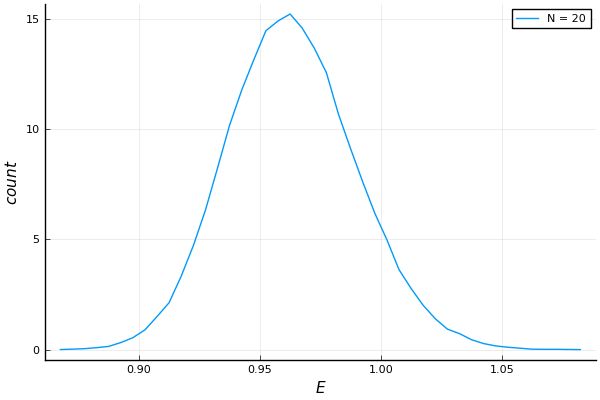

In [29]:
it_num = 100_000
plot()
file_fd = string("eig_saves/EIGmax_SYK_N", 16, ".dat")
fd1 = readdlm(file_fd);
fd2 = reshape(fd1, it_num);
h = fit(Histogram, fd2, nbins=70)
h = normalize(h, mode=:pdf)
r = h.edges[1]
x = first(r)+step(r)/2:step(r):last(r)
plot!(x, h.weights, label = "N = 20")
ylabel!(L"count")
xlabel!(L"E")